# **Data Mining Final Project**
# PART 2: Handling Class Imbalance with SMOTE


# **Introduction:**
# This notebook addresses the severe class imbalance problem in our credit card fraud dataset.With only 0.17% of transactions being fraudulent, standard models would likely predict all transactions as non-fraudulent and still achieve 99.83% accuracy. We implement the Synthetic Minority Over-sampling Technique (SMOTE) to generate synthetic examples of the minority class, creating a more balanced dataset for model training.

# Step 1: Import necessary libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# Step 2: Load the preprocessed data
# We already have preprocessed training and test set variables from credit_card_fraud_preprocessing.ipynb
# upload the CSV file：

In [ ]:
# 1. Load the Preprocessed Data
# Make sure to upload 'train_preprocessed.csv' to Colab
from google.colab import files

# Upload the preprocessed training data
uploaded = files.upload()

# Load the data
data = pd.read_csv('train_preprocessed.csv')

Saving train_preprocessed.csv to train_preprocessed.csv


# Step3: Initial Data Exploration and Visualization


In [ ]:
# 2. Initial Data Exploration and Visualization
def explore_class_distribution(data):
    """
    Explore and visualize class distribution
    """
    plt.figure(figsize=(10,6))
    data['Class'].value_counts().plot(kind='bar')
    plt.title('Class Distribution Before SMOTE')
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.show()

    # Print class distribution percentages
    print("Class Distribution:")
    print(data['Class'].value_counts(normalize=True) * 100)


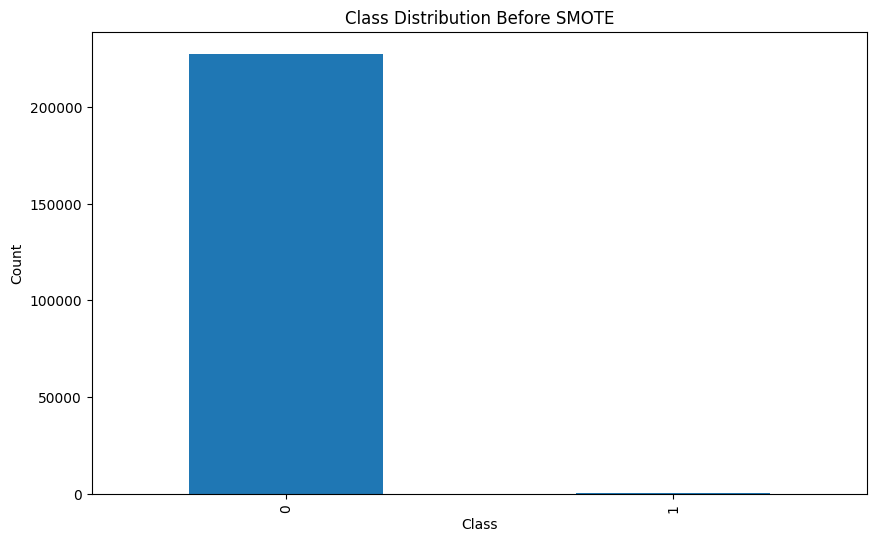

Class Distribution:
Class
0    99.827075
1     0.172925
Name: proportion, dtype: float64


In [ ]:
# Explore initial distribution
explore_class_distribution(data)

# 3. Prepare Data for SMOTE

In [ ]:
# Separate features and target
X = data.drop('Class', axis=1)
y = data['Class']

# 4. SMOTE Implementation with Multiple Sampling Strategies


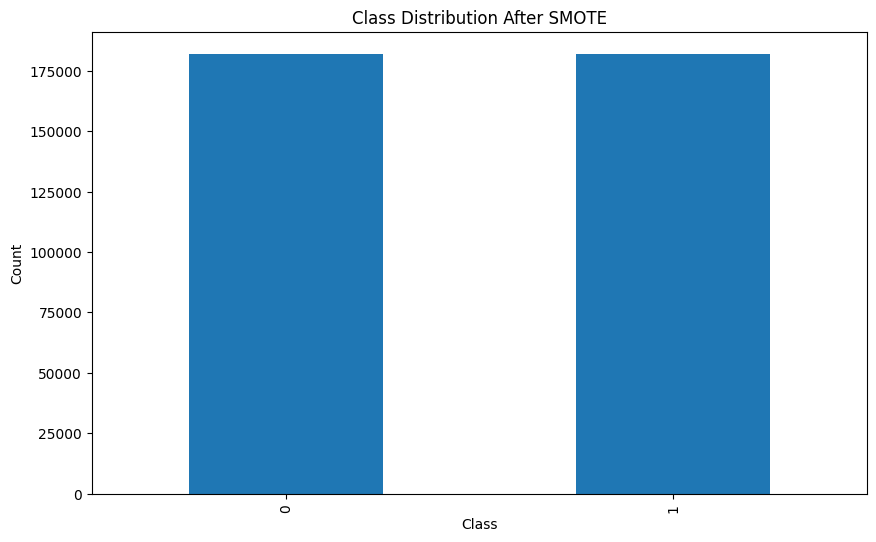

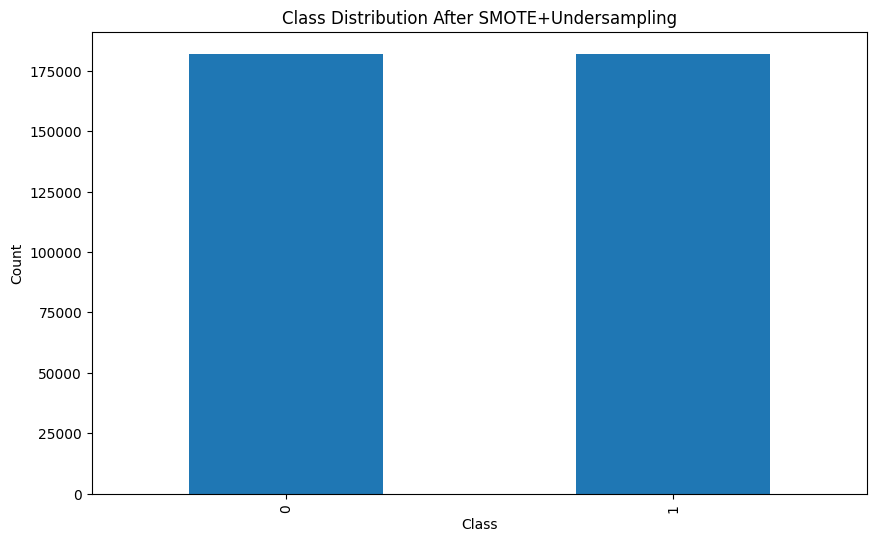

In [ ]:
def apply_smote_techniques(X, y):
    """
    Apply different SMOTE techniques and compare results
    """
    # Different sampling strategies
    sampling_strategies = [
        ('SMOTE', SMOTE(random_state=42)),
        ('SMOTE+Undersampling', Pipeline([
            ('smote', SMOTE(random_state=42)),
            ('undersampler', RandomUnderSampler(random_state=42))
        ])),
        # Add more sampling techniques as needed
    ]

    # Results dictionary
    sampling_results = {}

    for name, sampler in sampling_strategies:
        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

        # Scale the features
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Apply sampling
        if isinstance(sampler, Pipeline):
            X_resampled, y_resampled = sampler.fit_resample(X_train_scaled, y_train)
        else:
            X_resampled, y_resampled = sampler.fit_resample(X_train_scaled, y_train)

        # Visualize distribution after resampling
        plt.figure(figsize=(10,6))
        pd.Series(y_resampled).value_counts().plot(kind='bar')
        plt.title(f'Class Distribution After {name}')
        plt.xlabel('Class')
        plt.ylabel('Count')
        plt.show()

        # Store results
        sampling_results[name] = {
            'X_resampled': X_resampled,
            'y_resampled': y_resampled
        }

    return sampling_results

# Apply SMOTE techniques
smote_results = apply_smote_techniques(X, y)

# 5. Detailed Analysis of SMOTE Results


In [ ]:
def analyze_smote_results(smote_results):
    """
    Provide detailed analysis of SMOTE sampling results
    """
    for strategy, result in smote_results.items():
        print(f"\n--- {strategy} Analysis ---")
        print("Original Shape:", X.shape)
        print("Resampled Shape:", result['X_resampled'].shape)

        # Class distribution
        orig_dist = y.value_counts(normalize=True)
        resampled_dist = pd.Series(result['y_resampled']).value_counts(normalize=True)

        print("\nOriginal Distribution:")
        print(orig_dist)
        print("\nResampled Distribution:")
        print(resampled_dist)

# Analyze SMOTE results
analyze_smote_results(smote_results)


--- SMOTE Analysis ---
Original Shape: (227845, 29)
Resampled Shape: (363922, 29)

Original Distribution:
Class
0    0.998271
1    0.001729
Name: proportion, dtype: float64

Resampled Distribution:
Class
0    0.5
1    0.5
Name: proportion, dtype: float64

--- SMOTE+Undersampling Analysis ---
Original Shape: (227845, 29)
Resampled Shape: (363922, 29)

Original Distribution:
Class
0    0.998271
1    0.001729
Name: proportion, dtype: float64

Resampled Distribution:
Class
0    0.5
1    0.5
Name: proportion, dtype: float64


# 6. Cost-Sensitive Learning Demonstration



Cost-Sensitive Learning - balanced Class Weights:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     45490
           1       0.06      0.89      0.11        79

    accuracy                           0.98     45569
   macro avg       0.53      0.93      0.55     45569
weighted avg       1.00      0.98      0.99     45569



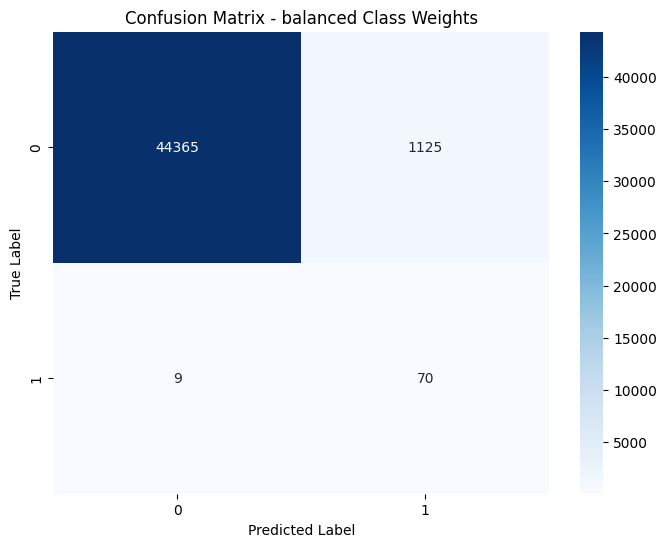


Cost-Sensitive Learning - custom Class Weights:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45490
           1       0.82      0.73      0.77        79

    accuracy                           1.00     45569
   macro avg       0.91      0.87      0.89     45569
weighted avg       1.00      1.00      1.00     45569



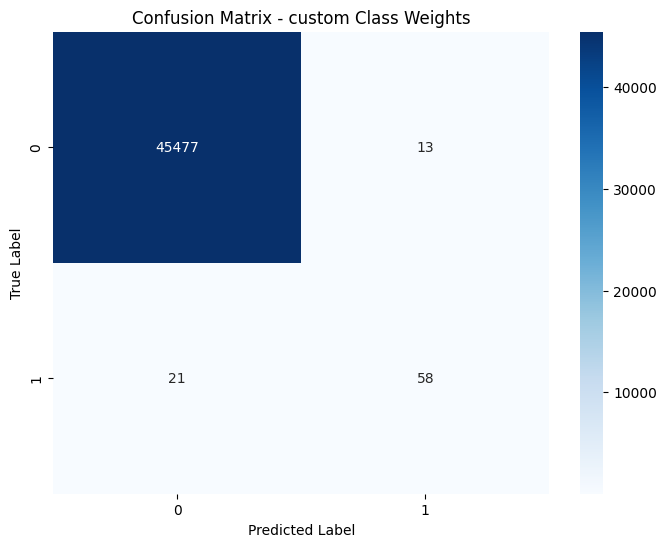


Cost-Sensitive Learning - custom Class Weights:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45490
           1       0.74      0.77      0.76        79

    accuracy                           1.00     45569
   macro avg       0.87      0.89      0.88     45569
weighted avg       1.00      1.00      1.00     45569



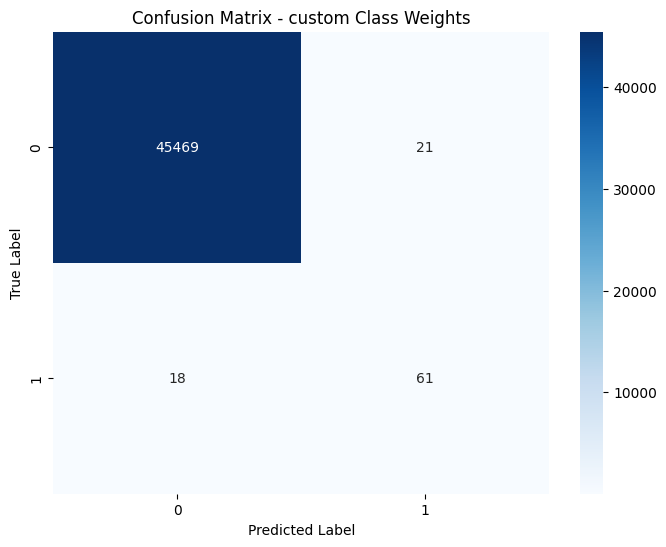

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, f1_score

def cost_sensitive_learning(X, y):
    """
    Demonstrate cost-sensitive learning approaches
    """
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Different class weight strategies
    class_weight_strategies = [
        ('balanced', 'balanced'),
        ('custom', {0: 1, 1: 5}),  # More weight to minority class
        ('custom', {0: 1, 1: 10})  # Even more weight to minority class
    ]

    for name, class_weight in class_weight_strategies:
        # Logistic Regression with different class weights
        clf = LogisticRegression(class_weight=class_weight, random_state=42)
        clf.fit(X_train_scaled, y_train)

        # Predictions
        y_pred = clf.predict(X_test_scaled)

        # Evaluation
        print(f"\nCost-Sensitive Learning - {name} Class Weights:")
        print(classification_report(y_test, y_pred))

        # Confusion Matrix
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(8,6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f'Confusion Matrix - {name} Class Weights')
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
        plt.show()

# Run cost-sensitive learning demonstration
cost_sensitive_learning(X, y)

# 7. Save Processed Data

In [ ]:
# You can choose which SMOTE strategy to save
chosen_strategy = 'SMOTE'  # or 'SMOTE+Undersampling'
chosen_result = smote_results[chosen_strategy]

# Create DataFrame from numpy arrays
X_smote = pd.DataFrame(chosen_result['X_resampled'], columns=X.columns)
y_smote = pd.Series(chosen_result['y_resampled'], name='Class')

# Combine features and target
smote_df = pd.concat([X_smote, y_smote], axis=1)

# Save to CSV
smote_df.to_csv('smote_processed_data.csv', index=False)

# Download the processed file
files.download('smote_processed_data.csv')

print("\nSMOTE processing complete. Processed data saved and downloaded.")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


SMOTE processing complete. Processed data saved and downloaded.
